In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'D:\Data of ML\student_info.csv')
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [3]:
df.shape

(200, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


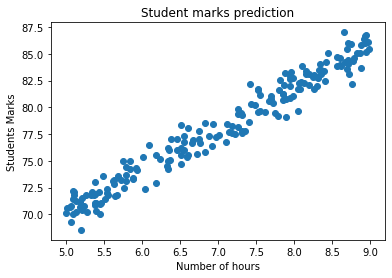

In [6]:
plt.scatter(df['study_hours'],df['student_marks'])
plt.xlabel('Number of hours')
plt.ylabel('Students Marks')
plt.title('Student marks prediction')
plt.show()

## Prepare the data for machine learning algorithm

In [7]:
#Data cleaning

In [8]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [9]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [10]:
df2=df.fillna(df.mean())
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [18]:
X=df2.drop('student_marks',axis=1)
y=df2.drop('study_hours',axis=1)
print(' shape of x',X.shape)
print(' shape of y',y.shape)

 shape of x (200, 1)
 shape of y (200, 1)


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)
print(' shape of X_train',X_train.shape)
print(' shape of X_test',X_test.shape)
print(' shape of y_train',y_train.shape)
print(' shape of y_test',y_test.shape)

 shape of X_train (160, 1)
 shape of X_test (40, 1)
 shape of y_train (160, 1)
 shape of y_test (40, 1)


## select the data and train it

In [15]:
from sklearn.linear_model import LinearRegression   # Y=m*X+c

In [16]:
lr=LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lr.coef_

array([[3.93571802]])

In [30]:
lr.intercept_

array([50.44735504])

In [31]:
m=3.93571802
c=50.44735504
y=m*4+c
y

66.19022712

In [33]:
lr.predict([[4]])[0][0].round(2)

66.19

In [38]:
y_pred=lr.predict(X_test)

In [40]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=['student study hours','student orignal marks','student predicted marks'])

,student study hours,student orignal marks,student predicted marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [42]:
lr.score(X_test,y_test).round(2)

0.95

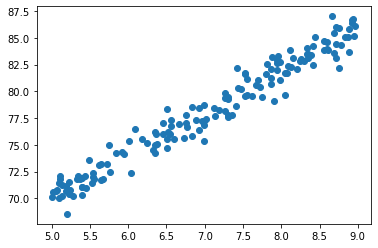

In [44]:
plt.scatter(X_train,y_train)

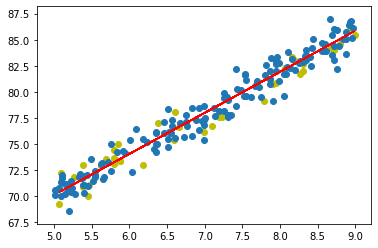

In [51]:
plt.scatter(X_test,y_test,color="y")
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred,color='r')

# present your solution

# Save ML Model

In [53]:
import joblib

In [55]:
joblib.dump(lr,'Student_marks_predtictor_model.pkl')

['Student_marks_predtictor_model.pkl']

In [56]:
model=joblib.load('Student_marks_predtictor_model.pkl')

In [70]:
model.predict([[5]])[0][0].round(2)

70.13

In [74]:
 model.intercept_

array([50.44735504])